# BL40A2020 Wireless Communication Systems

## Week 4: Probability theory and random processes

## Author: Pedro Nardelli


In [2]:
! pip install komm

In [3]:
import math
import komm
import sympy as sp
sp.init_printing() 
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.interpolate as interp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

# Binary symmetric channel

![](https://upload.wikimedia.org/wikipedia/commons/b/b5/Binary_symmetric_channel.svg)

Let's consider the following.

- Pr[transmit 0] = $q$
- Pr[transmit 1] = $1-q$
- Pr[receive 0 | transmit 0] = $1-p$
- Pr[receive 0 | transmit 1] = $p$
- Pr[receive 1 | transmit 1] = $1-p$
- Pr[receive 1 | transmit 0] = $p$

Probability theory states the following relations:

## Law of total probability
### Pr[receive 0] = Pr[receive 0 | transmit 0] x Pr[transmit 0] + Pr[receive 0 | transmit 1] x Pr[transmit 1] = $p + q - 2pq$
### Pr[receive 1] = Pr[receive 1 | transmit 0] x Pr[transmit 0] + Pr[receive 1 | transmit 1] x Pr[transmit 1] = $1 - (p + q - 2pq)$

## Bayes
### Pr[transmit b | receive b] x Pr[receive b] = Pr[receive b | transmit b] x Pr[transmit b]



## Experiment 

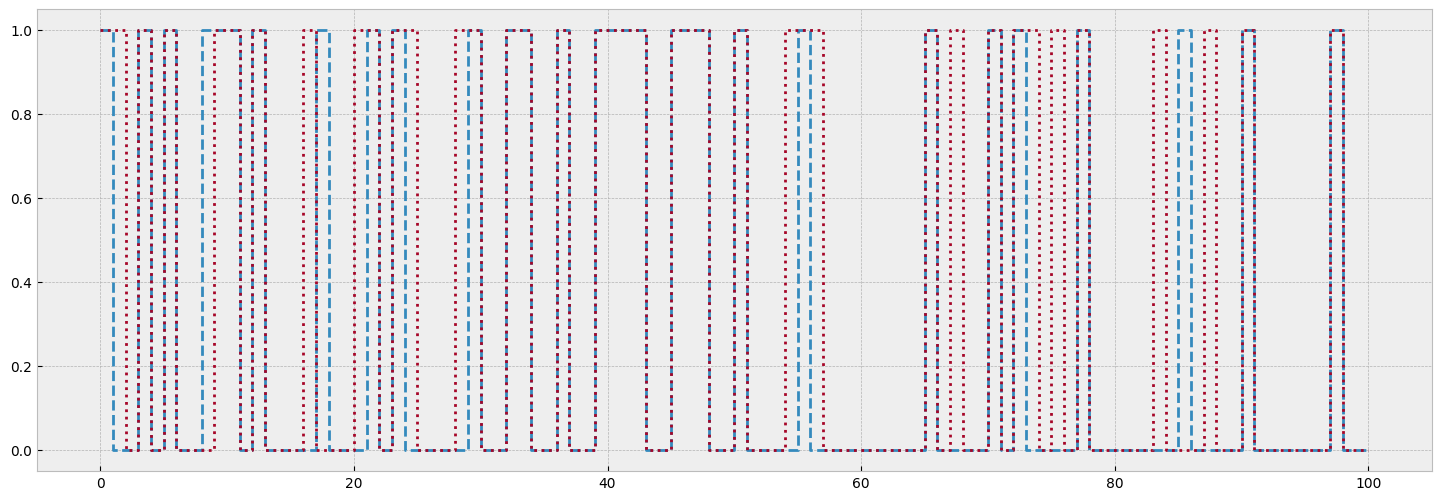

In [4]:
input_seq_size = 100 # sequence
tp = np.arange(0, input_seq_size , 1)
tp_plot = np.arange(0, input_seq_size +1, 1)
p_aux = 0.75 # q 
input_seq = np.random.choice([0, 1], size=input_seq_size, p=[p_aux, 1-p_aux])
input_seq_plot = np.append(input_seq,input_seq[input_seq_size-1])
p =0.2
bsc = komm.BinarySymmetricChannel(p)
output_seq = bsc(input_seq)
output_seq_plot = np.append(output_seq,output_seq[input_seq_size-1])
plt.rcParams['figure.figsize'] = 18, 6
plt.step(tp_plot ,input_seq_plot,where='post',linestyle='--');
plt.step(tp_plot ,output_seq_plot,where='post',linestyle=':');

In [5]:
p_r0 = (1-p)*p_aux + p*(1-p_aux)
p_t0_r0 = (1-p)*p_aux/p_r0
p_t1_r1 = (1-p)*(1-p_aux)/(1-p_r0)
num_zeros = (input_seq == 0).sum()
num_ones = (input_seq == 1).sum()
num_zeros_bsc = (output_seq== 0).sum()
num_ones_bsc = (output_seq == 1).sum()
print("Simulation vs. analytical results")
print("#################")
print("Input")
print("Probability input 0", num_zeros/input_seq_size, "Analytical:", p_aux)
print("Probability input 1:", num_ones/input_seq_size, "Analytical:", 1 - p_aux)
print("#################")
print("Output")
print("Probability output 0:", num_zeros_bsc/input_seq_size, "Analytical:", p_r0)
print("Probability output 1:",num_ones_bsc/input_seq_size, "Analytical:", 1 - p_r0)
print("#################")
print("Error probability due to channel")
count_0_1 = 0
count_1_0 = 0
for i in range(input_seq_size):
    if input_seq[i] != output_seq[i]:
        if input_seq[i] == 0:
            count_0_1 = count_0_1 +1
        if input_seq[i] == 1:
            count_1_0 = count_1_0 +1
print("Probability output 0 given input 1:",count_0_1/num_zeros, "Analytical:", p)
print("Probability output 1 given input 0:",count_1_0/num_ones, "Analytical:", p)
count_out0_in1 = 0
count_out1_in0  = 0
for i in range(input_seq_size):
    if output_seq[i] == 0:
        if input_seq[i] == 1:        
            count_out0_in1 = count_out0_in1 + 1
    if output_seq[i] == 1:
        if input_seq[i] == 0: 
            count_out1_in0 = count_out1_in0  + 1            
print("#################")
print("Conditional probabilities")   
print("Probability for input 0")   
print("Probability input 0 given output 0:",1 - count_out0_in1/num_zeros_bsc, "Analytical:", p_t0_r0)
print("Probability input 1 given output 0:",count_out0_in1/num_zeros_bsc, "Analytical:", 1 - p_t0_r0)            
print("Probability for input 1")            
print("Probability input 1 given output 1:", 1 - count_out1_in0 /num_ones_bsc, "Analytical:", p_t1_r1)
print("Probability input 0 given output 1:", count_out1_in0 /num_ones_bsc, "Analytical:", 1 - p_t1_r1)

Simulation vs. analytical results
#################
Input
Probability input 0 0.7 Analytical: 0.75
Probability input 1: 0.3 Analytical: 0.25
#################
Output
Probability output 0: 0.61 Analytical: 0.6500000000000001
Probability output 1: 0.39 Analytical: 0.34999999999999987
#################
Error probability due to channel
Probability output 0 given input 1: 0.17142857142857143 Analytical: 0.2
Probability output 1 given input 0: 0.1 Analytical: 0.2
#################
Conditional probabilities
Probability for input 0
Probability input 0 given output 0: 0.9508196721311475 Analytical: 0.923076923076923
Probability input 1 given output 0: 0.04918032786885246 Analytical: 0.07692307692307698
Probability for input 1
Probability input 1 given output 1: 0.6923076923076923 Analytical: 0.5714285714285717
Probability input 0 given output 1: 0.3076923076923077 Analytical: 0.42857142857142827


## Random variables

**Discrete**
- Bernoulli random variable: $X$ is a random varible that may assume a value $0$ or $1$ so that $p_0 = 1-p$.
- Binomial random variable: $Y$ refers to the number of $1$'s as independent outcomes of $n$ Bernourlli trials. $Y$ may assume values from $0,1,...,n$ and the probability is computed as $$\mathrm{Prob}\left[Y = k \right] = \binom{n}{k}p^k(1-p)^{n-k},$$.
- Poisson random variable: $Z$ is a random variable when $n \rightarrow \infty$ and $p$ is small, therefore $$\mathrm{Prob}\left[Z = k \right] = \dfrac{{e^{ - \lambda } \lambda ^k }}{{k!}}$$ with mean $\lambda$.

Simulating Bernourlli random variables with probability $p = 0.2$ and $100$ trials

In [6]:
input_seq_size = 10
p_aux = 0.2
input_seq = np.random.choice([0, 1], size=input_seq_size, p=[p_aux, 1-p_aux])
num_zeros = (input_seq == 0).sum()
num_ones = (input_seq == 1).sum()
print("#################")
print("Trials:", input_seq_size)
print("Probability input 0:", num_zeros/input_seq_size, "Analytical:", p_aux)
print("Probability input 1:", num_ones/input_seq_size, "Analytical:", 1- p_aux)
input_seq_size = 1000
input_seq = np.random.choice([0, 1], size=input_seq_size, p=[p_aux, 1-p_aux])
num_zeros = (input_seq == 0).sum()
num_ones = (input_seq == 1).sum()
print("#################")
print("Trials:", input_seq_size)
print("Probability input 0:", num_zeros/input_seq_size, "Analytical:", p_aux)
print("Probability input 1:", num_ones/input_seq_size, "Analytical:", 1- p_aux)
input_seq_size = 100000
input_seq = np.random.choice([0, 1], size=input_seq_size, p=[p_aux, 1-p_aux])
num_zeros = (input_seq == 0).sum()
num_ones = (input_seq == 1).sum()
print("#################")
print("Trials:", input_seq_size)
print("Probability input 0:", num_zeros/input_seq_size, "Analytical:", p_aux)
print("Probability input 1:", num_ones/input_seq_size, "Analytical:", 1- p_aux)

#################
Trials: 10
Probability input 0: 0.2 Analytical: 0.2
Probability input 1: 0.8 Analytical: 0.8
#################
Trials: 1000
Probability input 0: 0.219 Analytical: 0.2
Probability input 1: 0.781 Analytical: 0.8
#################
Trials: 100000
Probability input 0: 0.2018 Analytical: 0.2
Probability input 1: 0.7982 Analytical: 0.8


### Now with Binomial with $p=0.2$ and 100 trials

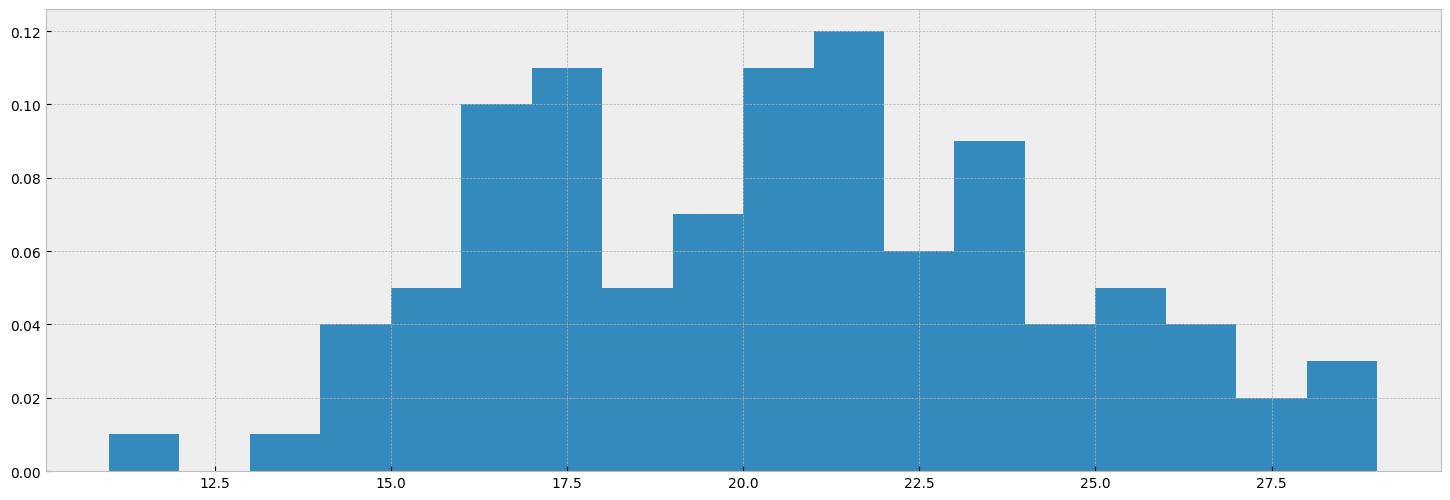

In [7]:
n=100
p=0.2
samples = np.random.binomial(n,p, size=100);
plt.hist(samples,density=True,bins=np.max(samples)-np.min(samples));

### Now with Binomial with $p=0.2$ and 1000000 trials

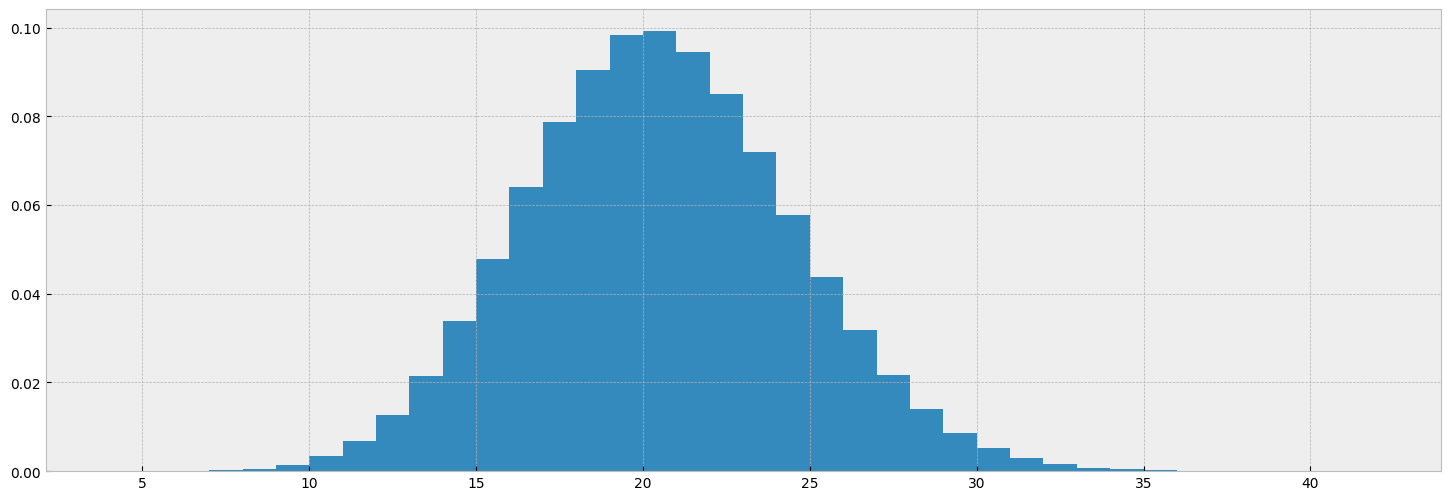

In [8]:
n=100
p=0.2
samples = np.random.binomial(n,p, size=1000000);
plt.hist(samples,density=True,bins=np.max(samples)-np.min(samples));

### Now let's compare with the analytical formula (already implemented in scipy)

In [9]:
from scipy.stats import binom
from scipy.stats import poisson

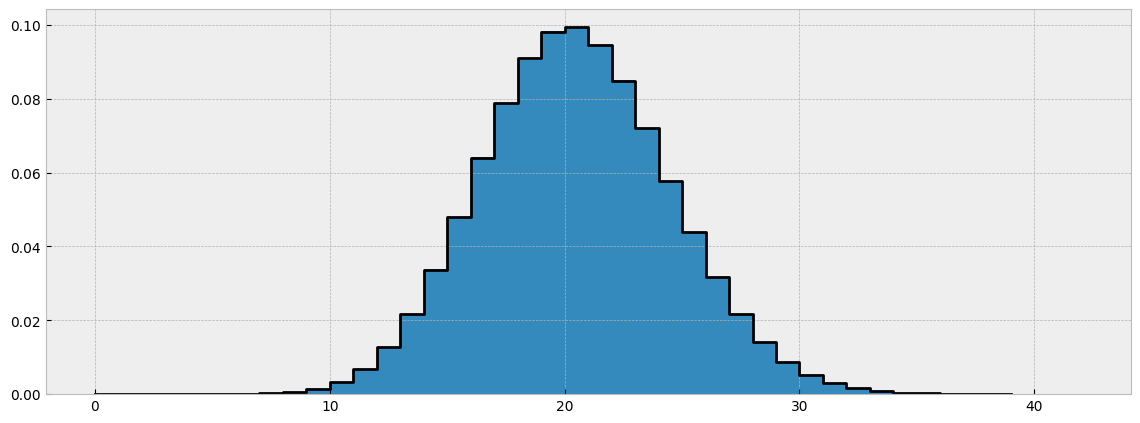

In [10]:
n=100
p=0.2
aux = np.arange(40)
plt.figure(figsize=(14,5))
plt.step(aux, binom.pmf(aux,n,p),'k', where='post')
#
plt.hist(samples,density=True,bins=np.max(samples)-np.min(samples));

### Poisson approximation (analytical): $\lambda = np$

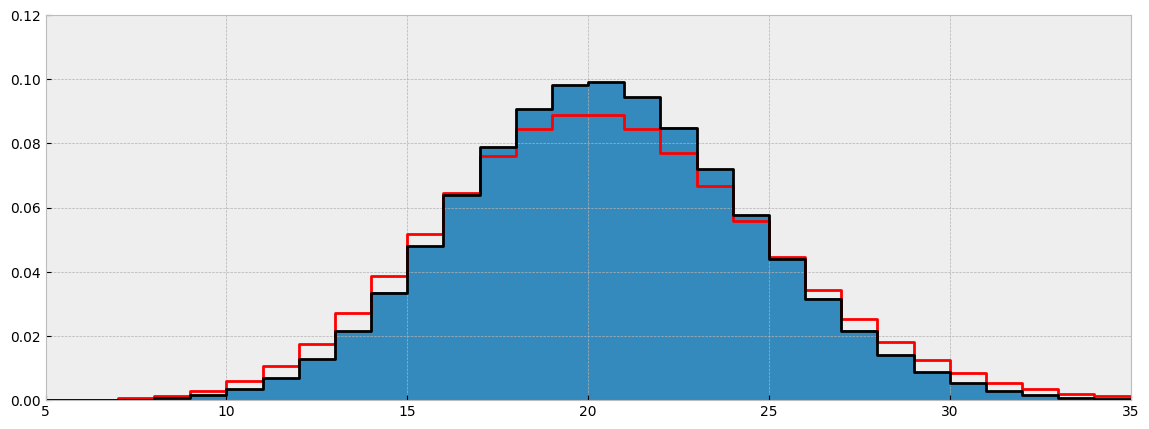

In [11]:
plt.figure(figsize=(14,5))
plt.step(aux, poisson.pmf(aux, n*p), 'r', where='post');
plt.step(aux, binom.pmf(aux,n,p),'k', where='post');
plt.hist(samples,density=True,bins=np.max(samples)-np.min(samples));
plt.axis([5,35,0,0.12]);

### Let's see with  $n = 10000$ and $p=0.05$ in the binomial distribution. Let's see how the Poisson approximation works.

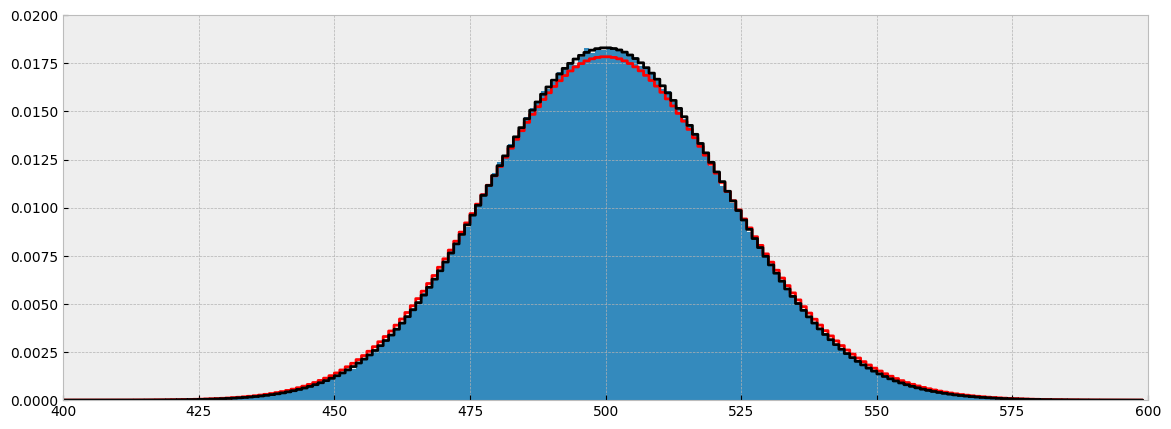

In [12]:
n=10000
p=0.05
aux = np.arange(600)
samples = np.random.binomial(n,p, size=1000000);
plt.figure(figsize=(14,5))
plt.step(aux, poisson.pmf(aux, n*p), 'r', where='post');
plt.step(aux, binom.pmf(aux,n,p),'k', where='post');
plt.hist(samples,density=True,bins=np.max(samples)-np.min(samples));
plt.axis([400,600,0,0.02]);

## Continuous

### Gaussian (Normal) random variable with sympy

In [13]:
from sympy.stats import Normal, density, E, std, cdf

In [14]:
mu = sp.Symbol("mu")
sigma = sp.Symbol("sigma", positive=True)
z = sp.Symbol("z")
y = sp.Symbol("y")
X = sp.stats.Normal("x", mu, sigma)

$X$ is a Gaussian random variable with mean $\mu$ and variance $\sigma^2$. Note that $\sigma$ is called standard deviation.

In [15]:
#Check expected value
sp.stats.E(X).simplify()

In [16]:
#Check standard deviation
sp.stats.std(X).simplify()

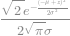

In [17]:
#Check the probability density function (pdf)
f=density(X)(z)
f

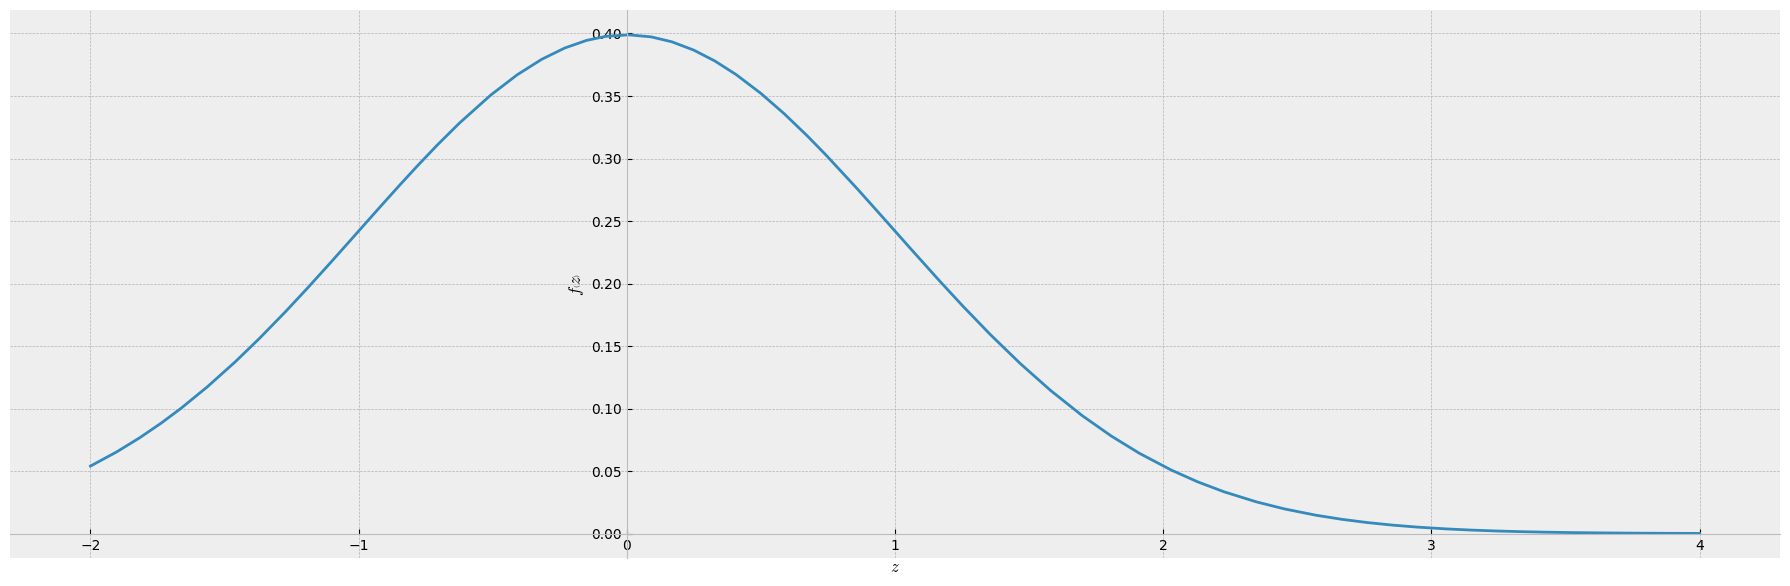

In [18]:
sp.plot(f.subs(sigma,1).subs(mu,0), (z, -2, 4));

In [19]:
#Cumulative probability distribution (cdf)
C = sp.simplify(cdf(X))(z) #erf - error function - numerical integral - more about it next week...
C

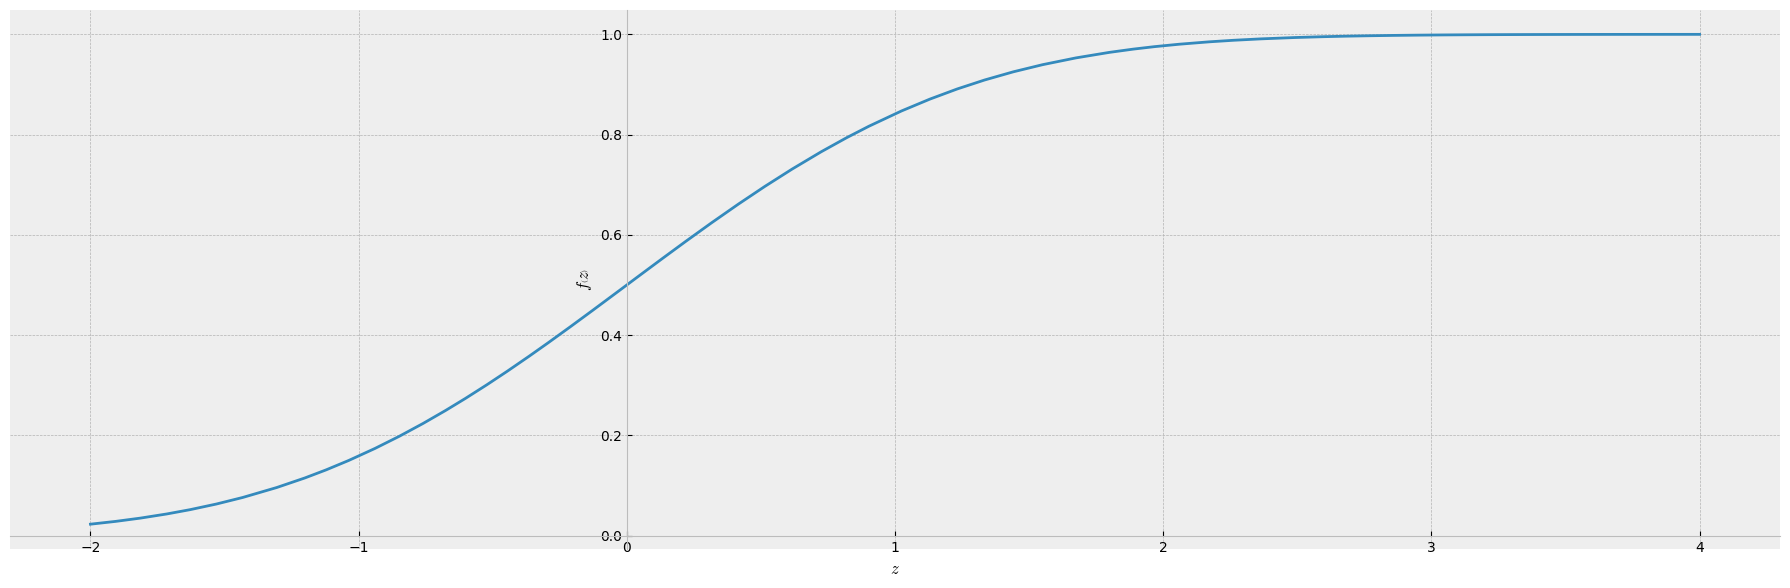

In [20]:
sp.plot(C.subs(sigma,1).subs(mu,0), (z, -2, 4));

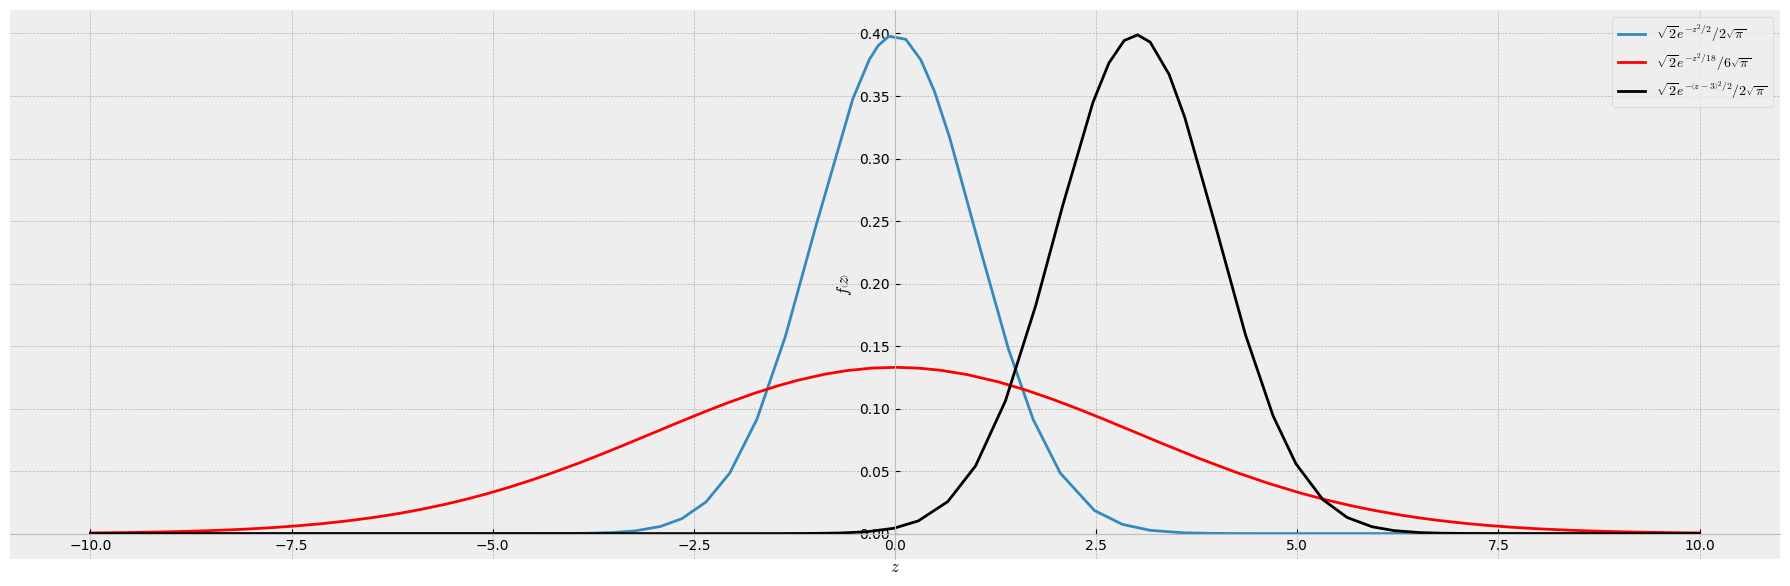

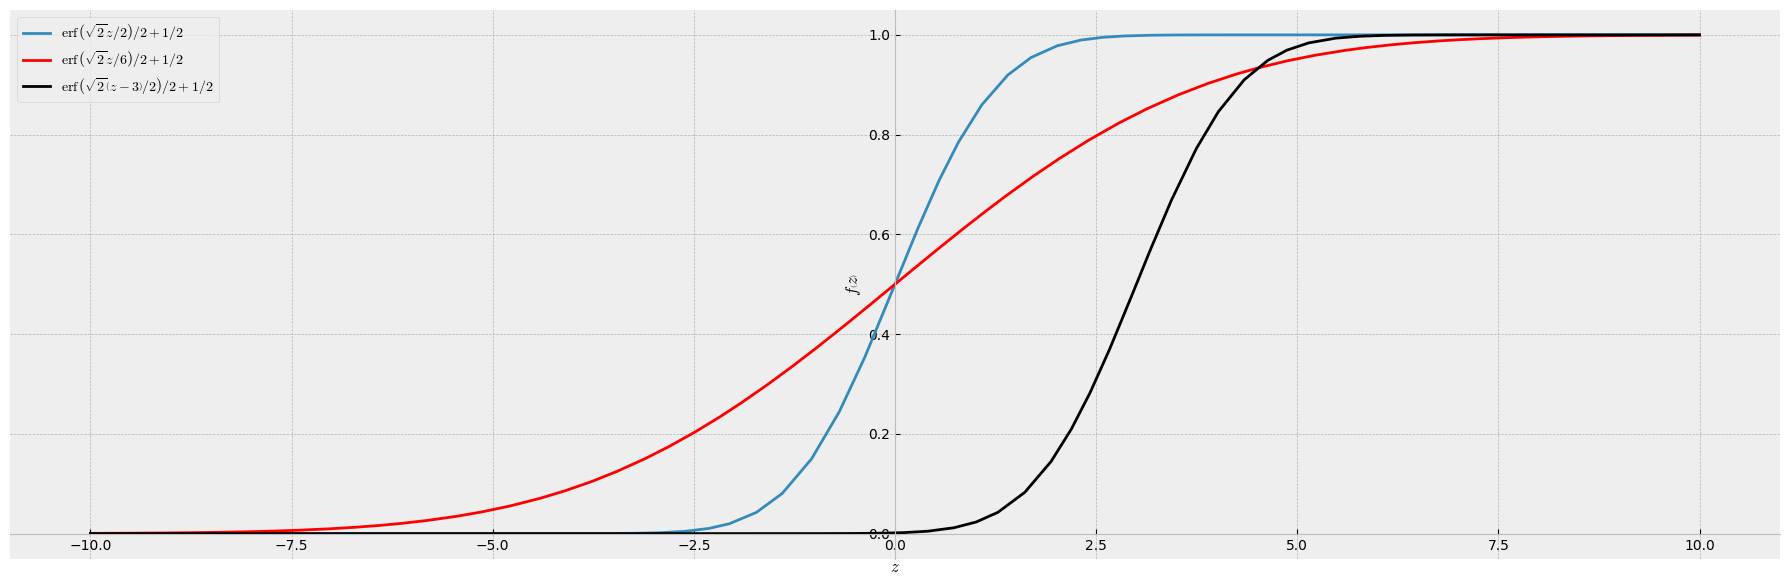

In [21]:
#differences
aux_plot= sp.plot(f.subs(sigma,1).subs(mu,0), f.subs(sigma,3).subs(mu,0), f.subs(sigma,1).subs(mu,3), (z, -10, 10), show=False, legend=True);
aux_plot[1].line_color = 'r'
aux_plot[2].line_color = 'k'
aux_plot.show()
aux_plot= sp.plot(C.subs(sigma,1).subs(mu,0), C.subs(sigma,3).subs(mu,0), C.subs(sigma,1).subs(mu,3), (z, -10, 10), show=False, legend=True);
aux_plot[1].line_color = 'r'
aux_plot[2].line_color = 'k'
aux_plot.show()

### Sympy can also compute manipulation of random variables.

- $Y = X+X = 2X$

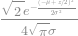

In [22]:
f_XpX=density(X+X)(z)
f_XpX

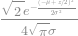

In [23]:
f_2X=density(2*X)(z)
f_2X

- $Z = X - X_2$ where $X$ and $X_2$ follows the same Gaussian distribution

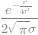

In [24]:
X2 = sp.stats.Normal("x2", mu, sigma)
f_XmX2=density(X-X2)(z)
f_XmX2.simplify()

## Random processes

Consirer the following signal:

$$X(t) = X_1 \cos(2\pi f_c t) - X_2 \sin(2\pi f_c t)$$,

where $X_1$ and $X_2$ are Gaussian random variables with mean 0 and variance 1. 

$X(t)$ is a random process with:
- $E[X(t)] = E[X_1] \cos(2\pi f_c t) -  E[X_2] \sin(2\pi f_c t) = 0$
- $\mathrm{var}(X(t)) = \mathrm{cov}(X_1 \cos(2\pi f_c t) - X_2 \sin(2\pi f_c t), X_1 \cos(2\pi f_c t) - X_2 \sin(2\pi f_c t)) =\\= \mathrm{cov}(X_1,X_1) \cos^2(2\pi f_c t) + \mathrm{cov}(X_2,X_2) \sin^2(2\pi f_c t) - 2\mathrm{cov}(X_1,X_2) \cos(2\pi f_c t)\sin(2\pi f_c t)) = \cos^2(2\pi f_c t) + \sin^2(2\pi f_c t) = 1$.

Therefore, $X(t)$ is also a Gaussian random variable with mean 0 and variance 1.

*Note:* Once the values of $X_1$ and $X_2$ are defined (after the random number is drawn), there is no more randomness in the process.

**Example**

In [25]:
f=density(X)(z)
f.subs(mu,0).subs(sigma,1)

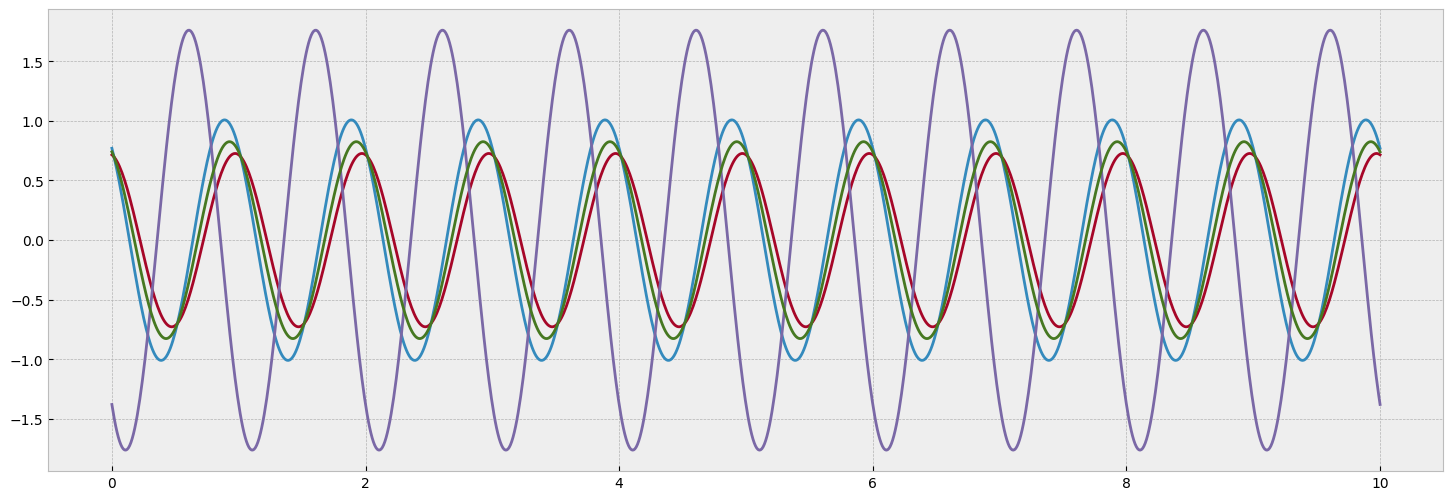

In [36]:
tp = np.linspace(0, 10, 1000)
freq = 1
#Using numpy
mu, sigma = 0, 1 # mean and standard deviation
#We will consider 4 realizations
x1 = np.random.normal(mu, sigma, 4)
x2 = np.random.normal(mu, sigma, 4)
for i in range(4):
    plt.plot(tp,x1[i]*np.cos(2*np.pi*freq*tp)-x2[i]*np.sin(2*np.pi*freq*tp))

## Other example

It is also possible to have the following random process:

$$Y(t) = X_1(t) \cos(2\pi f_c t) - X_2(t) \sin(2\pi f_c t) + X_3(t)$$,

where $X_k(t)$ is also a Gaussian random variable with mean 0 and variance 1.

- $E[Y(t)] = E[X_1(t)] \cos(2\pi f_c t) - E[X_2(t)]  \sin(2\pi f_c t)  + E[X_3(t)] = 0$
- $\mathrm{var}(Y(t)) = ( \cos^2(2\pi f_c t) + \sin^2(2\pi f_c t)) + \mathrm{var}(X_3(t)) = 2$, following steps similar to the above derivation, and that the variance of the sum of Gaussian random variables is also Gaussian with variance equals to the sum of variances.

Let's see how this looks like.

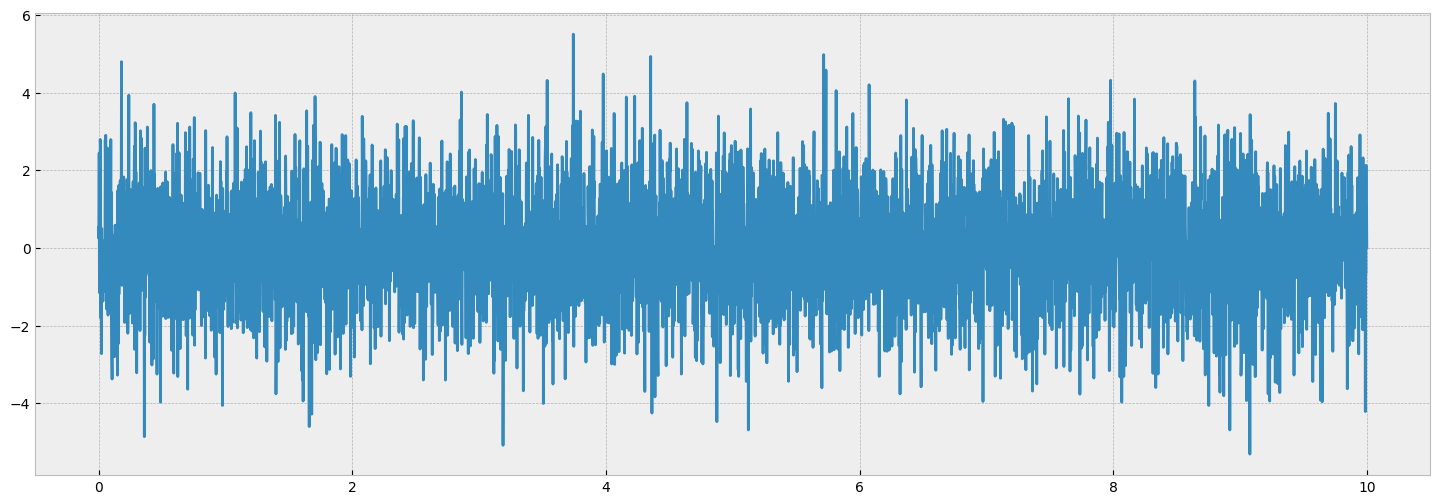

In [27]:
n_samples = 5000
tp = np.linspace(0, 10, n_samples)
freq = 1
#Using numpy
mu, sigma = 0, 1 # mean and standard deviation
#We will consider
x1 = np.random.normal(mu, sigma, n_samples)
x2 = np.random.normal(mu, sigma, n_samples)
x3 = np.random.normal(mu, sigma, n_samples)
y=x1*np.cos(2*np.pi*freq*tp)-x2*np.sin(2*np.pi*freq*tp) + x3
plt.plot(tp, y);

And the empirical statistics (histogram).

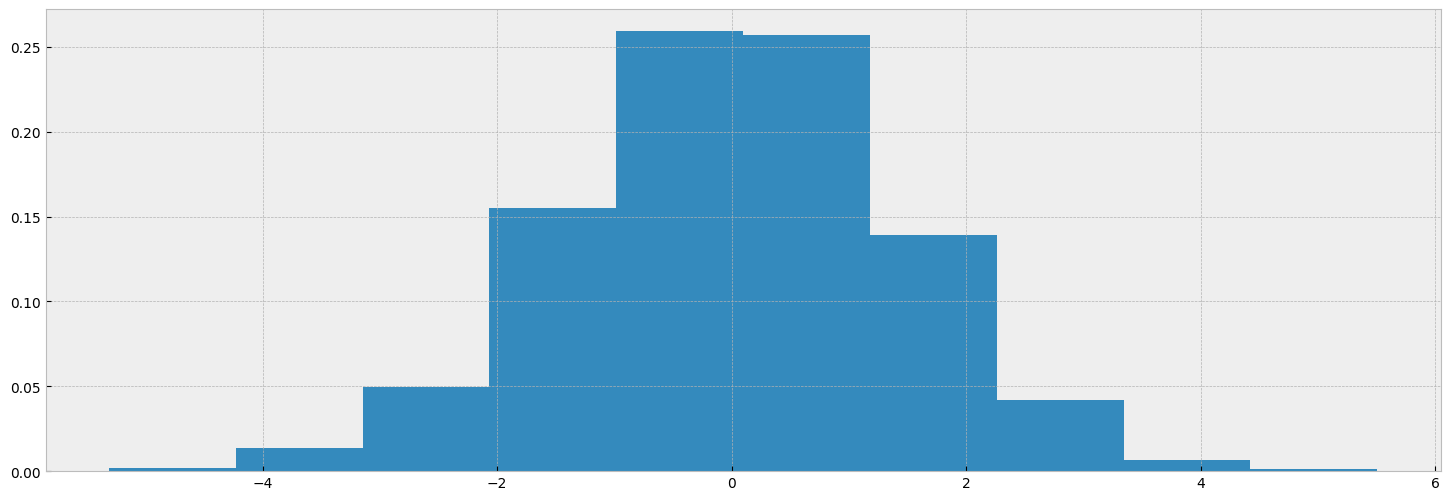

In [28]:
plt.hist(y,bins = 10,density=True);

We can compare this with our analytical finding that said that $Y(t)$ is also a normally distributed with mean 0 and variance 2.

First we define the analytical function using sympy.

In [29]:
#careful with the name of the variables
Y = sp.stats.Normal("y", 0, sp.sqrt(2)) # remember the input is standard deviation, which is the square root of the variance.
t = sp.Symbol("t")
f=density(Y)(t)
analytical_pdf =  sp.lambdify(t,f,"numpy")
f

Plotting them together.

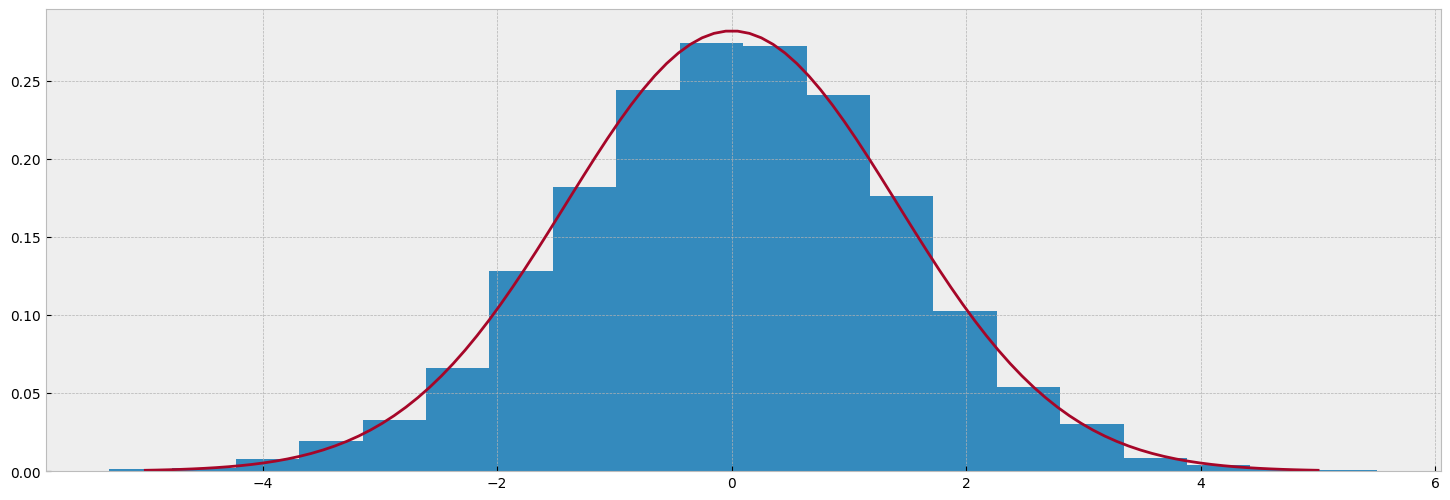

In [30]:
aux = np.linspace(-5, 5, 100)
plt.hist(y,bins = 20, density=True);
plt.plot(aux,analytical_pdf(aux));

### Last example

Consirer the following signal:

$$X(t) = X_1 \cos(2\pi f_c t) - X_2 \sin(2\pi f_c t) + X_3(t),$$

where $X_1$, $X_2$ and $X_3(t)$ are Gaussian random variables with mean 0 and variance 1. 

**Is this the same case as before?**

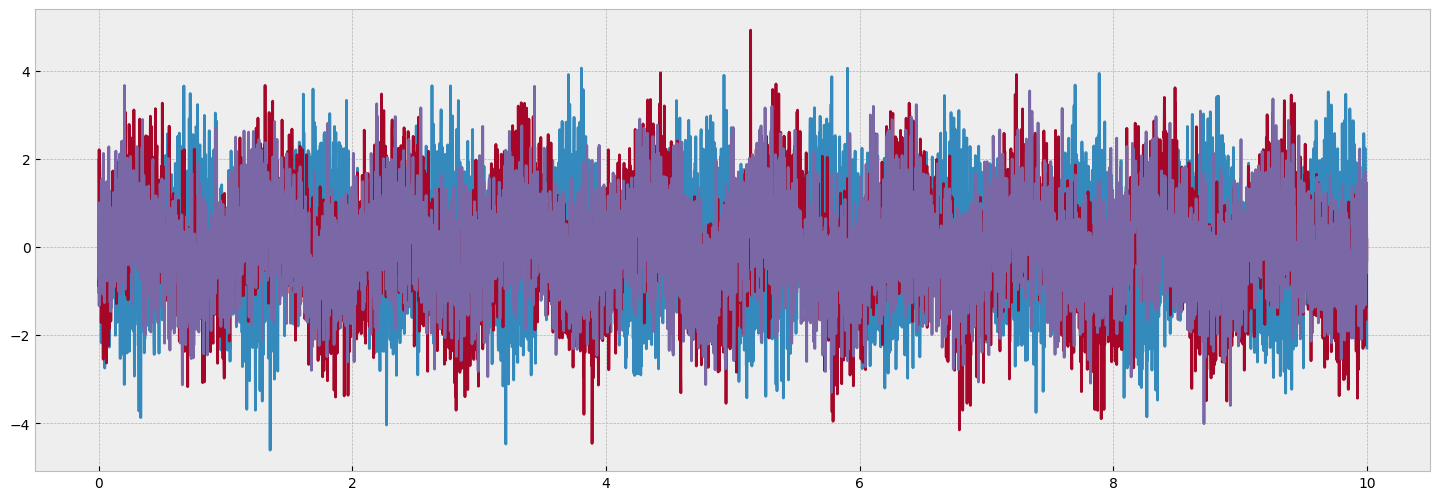

In [31]:
n_samples = 5000
tp = np.linspace(0, 10, n_samples)
freq = 1
#Using numpy
mu, sigma = 0, 1 # mean and standard deviation
#We will consider 1 realizationsin the Amplitude >> check the variation
x1 = np.random.normal(mu, sigma, 1)
x2 = np.random.normal(mu, sigma, 1)
x3 = np.random.normal(mu, sigma, n_samples)
y1=x1*np.cos(2*np.pi*freq*tp)-x2*np.sin(2*np.pi*freq*tp) + x3
plt.plot(tp, y1);
x1 = np.random.normal(mu, sigma, 1)
x2 = np.random.normal(mu, sigma, 1)
x3 = np.random.normal(mu, sigma, n_samples)
y2=x1*np.cos(2*np.pi*freq*tp)-x2*np.sin(2*np.pi*freq*tp) + x3
plt.plot(tp, y2);
x1 = np.random.normal(mu, sigma, 1)
x2 = np.random.normal(mu, sigma, 1)
x3 = np.random.normal(mu, sigma, n_samples)
y3=x1*np.cos(2*np.pi*freq*tp)-x2*np.sin(2*np.pi*freq*tp) + x3
plt.plot(tp, y3);

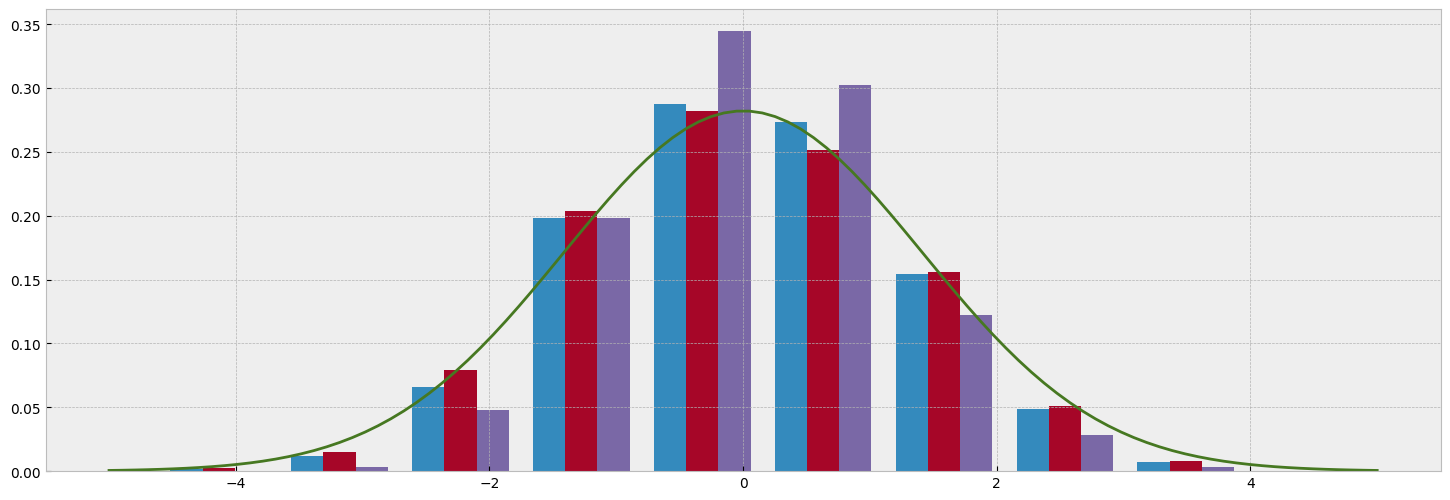

In [32]:
aux = np.linspace(-5, 5, 100)
plt.hist([y1, y2, y3], density=True)
plt.plot(aux,analytical_pdf(aux));